<a href="https://colab.research.google.com/github/Jrhymer34/skills-introduction-to-github/blob/main/6_18_Lab_Modelling_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6.18. Lab - Modelling in Python

## Introduction

In this lab we will step through an end-to-end prediction process. Our data comes from the UCI Machine Learning Repository: [bank data](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

The goal is binary classification; to predict whether a customer will purchase a banking product marketed over the phone.

## Scenario

You are a data analyst working for a Portuguese bank. The bank has recently run a campaign to attempt to sell a new product to customers over the phone. The product is a term deposit, where customers deposit their money for a fixed period of time for a fixed interest rate. They want to analyze the results of this campaign to understand what makes customers likely to buy this particular product. Your job as the data analyst is to explore the data and use machine learning to build a model to predict whether a customer is likely to buy.

# <font color="red">Section 1 - exploration</font>

Take a look at the data:

In [1]:
from google.colab import files
files.upload()
import pandas as pd

bank = pd.read_csv('bank.csv')

bank.head()

Saving bank.csv to bank.csv


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,NaN,0.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


#### 1. Read the data dictionary to understand what the columns mean

Which column is the one we will use for prediction?

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

#### 2. Summarise the dataset at a high level

- How many rows and columns are there?
- Are there any missing values?
- Are the data types as you would expect them?

What do each of the results tell you in turn?

In [2]:
bank.shape

(41188, 20)

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         32591 non-null  float64
 5   housing         40198 non-null  float64
 6   loan            40198 non-null  float64
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [4]:
bank.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,8597
housing,990
loan,990
contact,0
month,0
day_of_week,0


In [5]:
bank.describe()

,age,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,32591.000000,40198.000000,40198.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,0.000092,0.536743,0.155431,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,0.009594,0.498654,0.362319,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,0.000000,0.000000,0.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,0.000000,1.000000,0.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,0.000000,1.000000,0.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,1.000000,1.000000,1.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [6]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
bank.housing.value_counts()

,count
housing,
1.0,21576
0.0,18622


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

#### 3. Investigate your features.

For each variable of interest you may want to:

- Investigate the spread of values
- Check for outliers
    - What do the outliers represent? Are they meaningful or are they more likely to be errors?
    - Are the outliers "different" from our main population in a meaningful way?
    - Do the outliers represent customers that you would still want to make predictions on?

#### 4. Deal with outliers

Based on your answers to question 3, decide whether to drop or keep your outliers

## **-Will not use Loan,default and housing in features**

<Axes: xlabel='age', ylabel='poutcome'>

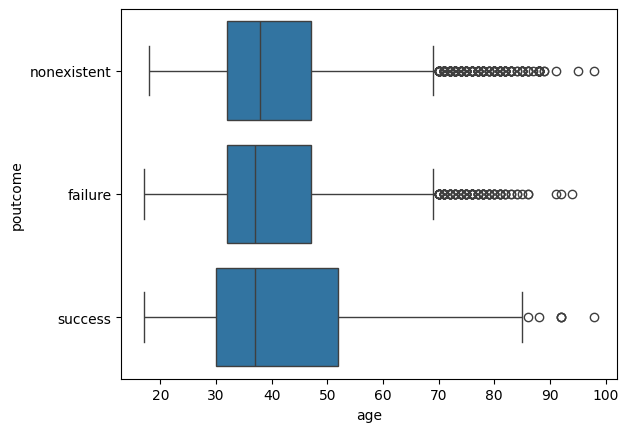

In [9]:
sns.boxplot(x='age',y='poutcome', data=bank)

In [10]:
bank.poutcome.value_counts()

,count
poutcome,
nonexistent,35563
failure,4252
success,1373


In [11]:
bank.poutcome.value_counts(normalize=True)

,proportion
poutcome,
nonexistent,0.863431
failure,0.103234
success,0.033335


<Axes: xlabel='previous', ylabel='campaign'>

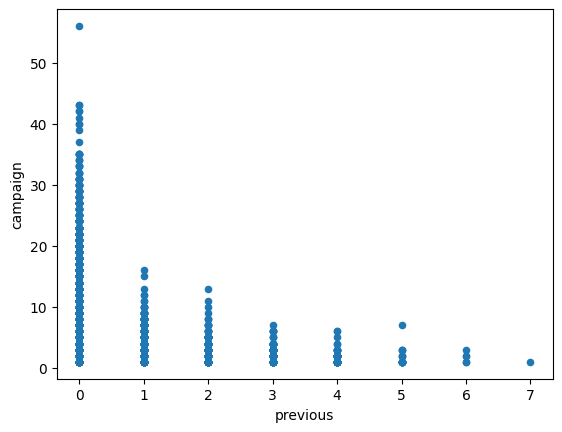

In [12]:
bank.plot(kind='scatter',x='previous',y='campaign')

In [13]:
pd.crosstab(bank.previous,bank.y)

y,0,1
previous,,
0,32422,3141
1,3594,967
2,404,350
3,88,128
4,32,38
5,5,13
6,2,3
7,1,0


In [43]:
pd.crosstab(bank.campaign,bank.y.sample(10))

y,0,1
campaign,,
1,4,0
2,1,0
3,0,1
4,1,0
8,1,0
10,1,0
17,1,0


<Axes: xlabel='poutcome', ylabel='previous'>

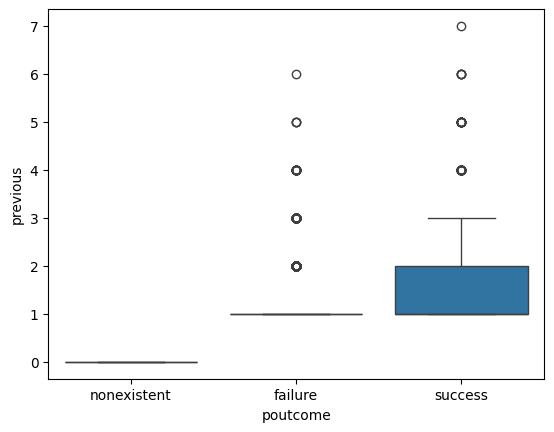

In [16]:
sns.boxplot(data=bank,x='poutcome',y='previous')

<Axes: xlabel='campaign', ylabel='day_of_week'>

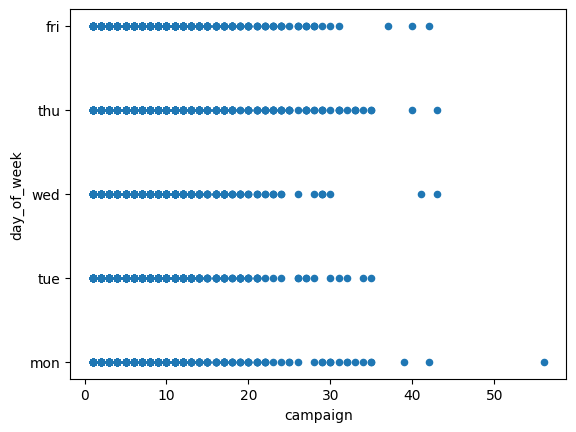

In [17]:
bank.plot(kind='scatter',x='campaign',y='day_of_week')

<Axes: xlabel='campaign', ylabel='job'>

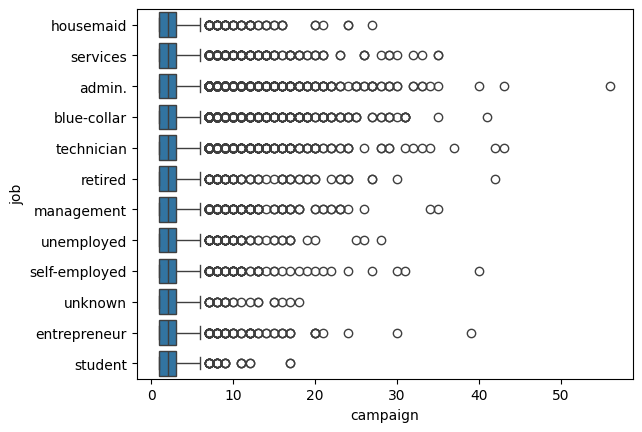

In [18]:
sns.boxplot(data=bank,x='campaign',y='job')

In [22]:
bank.columns=[col.lower().replace('.','_') for col in bank.columns]
target='y'

#### 5. Investigate some of the categorical columns

First, identify which columns are categorical (including binary)

Investigate the breakdown of values of some of these columns. If you notice any odd values, investigate them and deal with them (either drop or keep them).

In [23]:
features=[]
for col in bank:
  if col not in['default','housing','loan','y']:
    features.append(col)
day=bank.day_of_week.map({'mon':0,'tue':1,'wed':2,'thu':3, 'fri':4})
num_col=['age','day','duration','campaign','pdays','previous']
cat_col=['job','marital','education','contact','month','poutcome']

In [21]:
bank.y.value_counts(normalize=True)

,proportion
y,
0,0.887346
1,0.112654


In [45]:
pd.crosstab(bank.job, bank.y)

y,0,1
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


In [46]:
bank.groupby('job').y.value_counts(normalize=True,ascending=False).head(10)

job           y
admin.        0    0.870274
              1    0.129726
blue-collar   0    0.931057
              1    0.068943
entrepreneur  0    0.914835
              1    0.085165
housemaid     0    0.900000
              1    0.100000
management    0    0.887825
              1    0.112175
Name: proportion, dtype: float64

#### 6. Now explore the relationships between your potential features and the target

The sorts of questions you are interested in are "how does the distribution of our target vary across values of our features?" - in this case "how does the % of people who purchased the product vary by age/job/education level etc.?"

First, focus on the numeric columns.

You may decide to group your continuous columns (like age) into buckets and calculate the % of people who purchased the product. A trick you can use here is that taking the average of a binary column gives you the % of 1s in that column.

What do you conclude about the relationship between your columns and the likelihood of purchasing the product?

In [24]:
pd.crosstab(bank.age,bank.y).sample(10)

y,0,1
age,,
72,21,13
78,13,14
66,28,29
25,505,93
89,0,2
29,1267,186
94,1,0
49,784,55
69,20,14


In [26]:
pd.crosstab(bank.emp_var_rate,bank.cons_price_idx).head()

cons_price_idx,92.201,92.379,92.431,92.469,92.649,92.713,92.756,92.843,92.893,92.963,...,93.876,93.918,93.994,94.027,94.055,94.199,94.215,94.465,94.601,94.767
emp_var_rate,,,,,,,,,,,,,,,,,,,,,
-3.4,0,267,447,0,357,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-3.0,0,0,0,0,0,172,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-2.9,770,0,0,178,0,0,0,0,0,715,...,0,0,0,0,0,0,0,0,0,0
-1.8,0,0,0,0,0,0,0,282,5794,0,...,212,0,0,0,0,0,0,0,0,0
-1.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,233,229,0,311,0,0,0


#### 7. Now investigate the relationship between the categorical variables and the target

First, identify which columns in the data are categorical.

The question we care about again is "how does the % of customers who bought the product vary among different jobs/education levels etc.?"

In [27]:
bank.groupby(by='y',axis=0).age.mean()

<ipython-input-27-d85ce0949ed0>:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  bank.groupby(by='y',axis=0).age.mean()


,age
y,
0,39.911185
1,40.913147


In [28]:
pd.crosstab(bank.job,bank.y)

y,0,1
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


In [29]:
pd.crosstab(bank.marital,bank.y)

y,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [30]:
pd.crosstab(bank.education,bank.y)

y,0,1
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


#### 8. Using the results of your EDA choose your features to put into your first predictive model

A "good" feature is one which contains *variance of the outcome*. For example, if people in all age groups bought the product at around the same %, age would **not** be a good feature, because it doesn't get us closer to separating those that bought from those that didn't.

In [31]:
feature_cols=['age','job','marital','education','contact','month','campaign','previous']
dummies=pd.get_dummies(bank.job,dtype=int,prefix='job',drop_first=True)
bank=pd.concat([bank,dummies],axis=1)
feature_cols=list(dummies.columns)
feature_cols.append('age')
X=bank[feature_cols]
y=bank.y

# <font color="red">Part 2 - our first model</font>

It's time to build your first predictive model.

#### 1. First, do any transformations required to our data
    
- If you haven't already, based on your EDA results drop any values you don't wish to use (outliers, certain categories)
- For your categorical column(s) convert the columns to a dummy (one-hot encoded) representation if you wish to use them

Once you convert the categories to dummies, drop one of the columns per category. Remember this acts as a "reference", as your "default" category. Typically we choose the category containing the most values.

In [32]:
job_dummies=pd.get_dummies(bank.job,prefix='job',dtype=int,drop_first=True)
bank_dummies=pd.concat([bank,job_dummies],axis=1)
bank_dummies.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,...,0,1,0,0,0,0,0,0,0,0
1,57,services,married,high.school,NaN,0.0,0.0,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0


#### 2. Create the necessary `X_train`, `X_test`, `y_train` and `y_test` variables using the features you chose above.

Make sure `X_train` and `X_test` only include the features you chose (including the dummy variables for categorical features).

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [34]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=100)

#### 3. Train a classifier on the training data

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=50)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=50)

#### 4. Now dig into the evaluation of your first model
    
First of all, get the basic accuracy score and compare this against a baseline.
    
The baseline is "predict everything is the majority class" (in this case always predict no purchase). Our accuracy score should be higher than the % of the majority class.

In [36]:
predictions=rf.predict(X_test)
print('RF',metrics.accuracy_score(y_test,predictions))

RF 0.8858890939108478


#### 5. Now build and inspect the confusion matrix

- What does a false positive mean in this task? What does a false negative mean?
- Which do you have more of?
- What is the cost associated with these?

[[9086   63]
 [1112   36]]


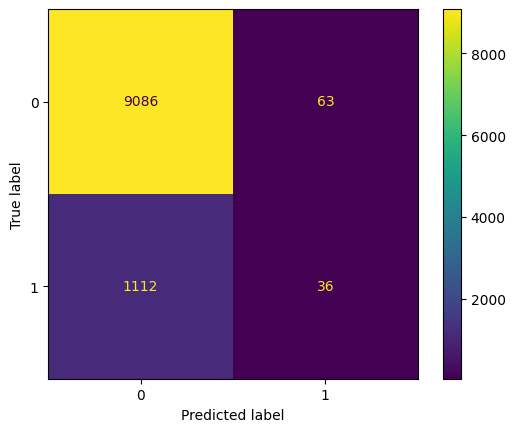

In [37]:
cm=confusion_matrix(y_test,predictions)
print(cm)
disp= ConfusionMatrixDisplay(cm)
disp.plot();

#### 6. Inspect the errors in more detail

Beyond summary accuracy metrics, you want to know how your model performed across various customers.

Your analysis should **not** be limited to the columns you used as features. If you used age for example, consider looking at how errors are distributed among marital status for example.

What you want to know is: ***is our model more/less accurate for different types of customers?***

An idea for this is to:
- create a column that denotes whether a customer was correctly predicted as wanting to purchase the product or not
- look at the distribution this column (i.e. the accuracy) among different categories (either age, job, education level etc.)

In [38]:
def loan_term_model(feature_cols):
  feature_cols=['age','education']
dummies=pd.get_dummies(bank[feature_cols],dtype=int,drop_first=True)
bank=pd.concat([bank,dummies],axis=1)
feature_cols=list(dummies.columns)
feature_cols.append('age')
X=bank[feature_cols]
y=bank.y
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100, stratify=y)
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)
rf=RandomForestClassifier()
rf.fit(X_train_sc,y_train)
predictions=rf.predict(X_test_sc)
print(accuracy_score(y_test,predictions),recall_score(y_test,predictions))


feature_cols=['age','education']
loan_term_model(feature_cols)

0.8846265902690104 0.04741379310344827


#### 7. Build your second model

Now try to change something based on the process and results so far, and inspect the accuracy and confusion matrix again

- If you are happy with your features, you could tweak some parameters in your classifier
- If you had some additional features you thought may be useful, try adding them
- BONUS: you could even *create* new features based on your EDA!

In [39]:
dummies_bank=pd.get_dummies(bank.education, prefix='education',dtype=int,drop_first=True)
dummies_edu=pd.concat([bank,dummies_bank], axis=1)
dummies_edu.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_unemployed,job_unknown,age,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,...,0,0,56,0,0,0,0,0,0,0
1,57,services,married,high.school,NaN,0.0,0.0,telephone,may,mon,...,0,0,57,0,0,1,0,0,0,0
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,...,0,0,37,0,0,1,0,0,0,0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,...,0,0,40,1,0,0,0,0,0,0
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,...,0,0,56,0,0,1,0,0,0,0


In [40]:
feature_cols=['age','contact','marital']
dummies_2=pd.get_dummies(bank.age,dtype=int,drop_first=True)
bank=pd.concat([bank,dummies_2],axis=1)
feature_cols=list(dummies.columns)
feature_cols.append('age')
X=bank[feature_cols]
y=bank.y
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100, stratify=y)
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)


#### 8. Finally, evaluate both models on the test set

How did your two models perform? Which was better?

In [41]:
kn=KNeighborsClassifier()
kn.fit(X_train_sc,y_train)
predictions=kn.predict(X_test_sc)
print(accuracy_score(y_test,predictions),recall_score(y_test,predictions))

sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)
rf=RandomForestClassifier()
rf.fit(X_train_sc,y_train)
predictions=rf.predict(X_test_sc)
print(accuracy_score(y_test,predictions),recall_score(y_test,predictions))


0.8744294454695543 0.06896551724137931
0.8842381276099834 0.054310344827586204
